In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [44]:
df=pd.read_csv('Status_Kelmarsh_1.csv', skiprows=9)

In [45]:
df.to_csv('cleaned_file.csv', index=False)

In [46]:
df.head()

,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,2020-01-01 08:42:37,2020-01-01 08:43:25,00:00:48,Informational,10,Wind < start wind,NaN,External stop (low wind speed) (5),Out of Environmental Specification
1,2020-01-01 08:42:37,-,-,Informational,100070,Brake program 50,NaN,NaN,Out of Environmental Specification
2,2020-01-01 08:43:25,-,-,Informational,0,System OK,NaN,System OK (32),Full Performance
3,2020-01-01 08:43:25,-,-,Informational,100130,Automatic start-up,NaN,NaN,Full Performance
4,2020-01-01 09:34:35,-,-,Informational,100180,Run-up,NaN,NaN,Technical Standby


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp start            8737 non-null   object 
 1   Timestamp end              8737 non-null   object 
 2   Duration                   8737 non-null   object 
 3   Status                     8737 non-null   object 
 4   Code                       8737 non-null   int64  
 5   Message                    8737 non-null   object 
 6   Comment                    0 non-null      float64
 7   Service contract category  2307 non-null   object 
 8   IEC category               8674 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 614.4+ KB


In [48]:
status_counts = df['Status'].value_counts()

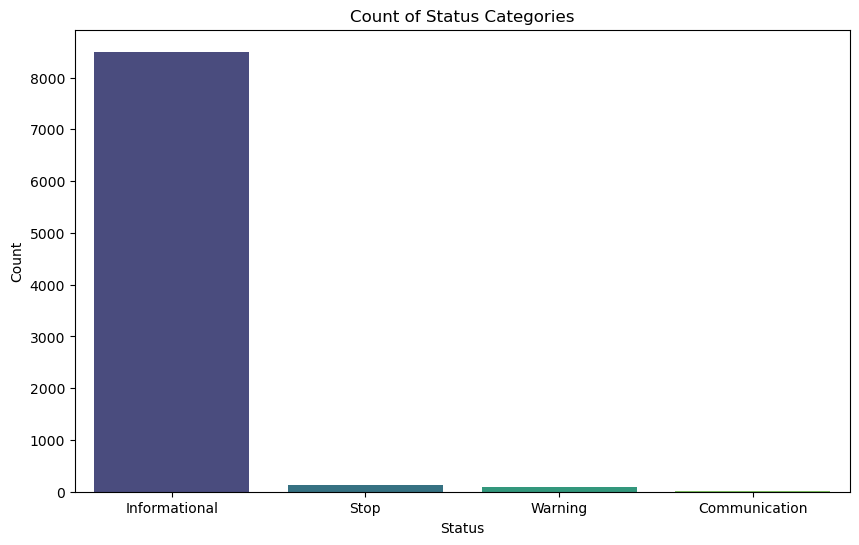

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Count of Status Categories')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [50]:
print(df['Duration'].unique())

['00:00:48' '-' '00:02:20' '00:00:47' '00:02:18' '00:52:26' '00:04:10'
 '00:03:01' '00:00:12' '00:00:31' '00:00:32' '00:00:11' '00:10:01'
 '00:02:19' '00:02:21' '00:00:10' '00:15:37' '00:46:04' '00:03:19'
 '01:55:49' '00:31:51' '00:44:20' '00:28:16' '00:25:11' '00:00:30'
 '00:00:49' '01:32:38' '00:15:39' '00:01:00' '00:10:00' '07:16:14'
 '04:01:05' '00:02:17' '00:12:11' '27:41:10' '00:25:57' '00:27:59'
 '00:21:21' '00:05:58' '00:02:08' '00:25:52' '00:00:16' '00:00:45'
 '00:02:59' '00:47:30' '00:02:55' '02:10:33' '00:12:05' '00:02:16'
 '00:11:48' '02:21:30' '00:32:43' '00:14:27' '00:02:15' '00:21:51'
 '05:14:01' '00:31:53' '00:37:19' '03:05:47' '00:39:27' '00:38:31'
 '00:18:36' '00:17:50' '00:20:35' '02:00:07' '00:49:33' '00:09:25'
 '00:10:06' '00:00:52' '00:11:57' '00:57:45' '00:26:36' '01:14:55'
 '04:46:11' '00:04:05' '07:25:32' '06:35:33' '02:25:15' '00:29:34'
 '03:15:57' '03:04:00' '00:00:03' '00:40:26' '00:40:27' '00:40:00'
 '00:43:23' '00:01:16' '00:24:08' '00:23:26' '05:32:23' '0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


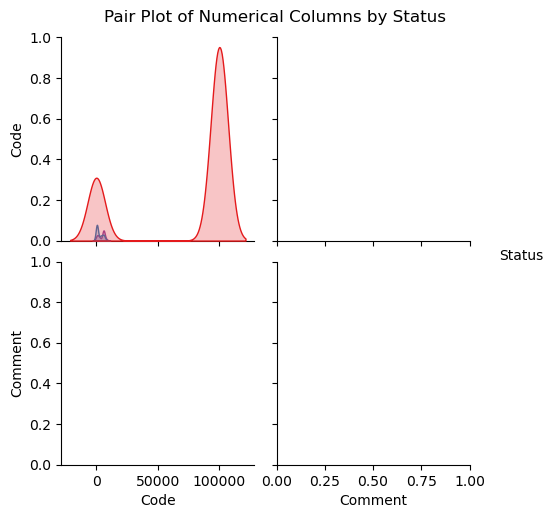

In [51]:
#pairplot
sns.pairplot(df, hue='Status', palette='Set1')
plt.suptitle('Pair Plot of Numerical Columns by Status', y=1.02)
plt.show()

In [52]:
df = df.fillna(0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp start            8737 non-null   object 
 1   Timestamp end              8737 non-null   object 
 2   Duration                   8737 non-null   object 
 3   Status                     8737 non-null   object 
 4   Code                       8737 non-null   int64  
 5   Message                    8737 non-null   object 
 6   Comment                    8737 non-null   float64
 7   Service contract category  8737 non-null   object 
 8   IEC category               8737 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 614.4+ KB


In [54]:
df.head()

,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,2020-01-01 08:42:37,2020-01-01 08:43:25,00:00:48,Informational,10,Wind < start wind,0.0,External stop (low wind speed) (5),Out of Environmental Specification
1,2020-01-01 08:42:37,-,-,Informational,100070,Brake program 50,0.0,0,Out of Environmental Specification
2,2020-01-01 08:43:25,-,-,Informational,0,System OK,0.0,System OK (32),Full Performance
3,2020-01-01 08:43:25,-,-,Informational,100130,Automatic start-up,0.0,0,Full Performance
4,2020-01-01 09:34:35,-,-,Informational,100180,Run-up,0.0,0,Technical Standby


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


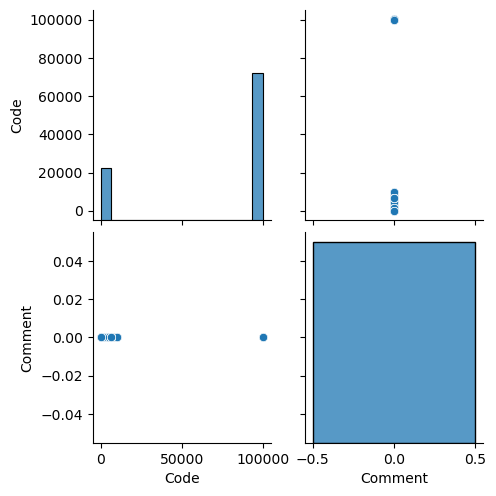

In [55]:
sns.pairplot(df)
plt.show()

In [56]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

In [57]:
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column],errors='coerce')

In [58]:
print(df.dtypes)

Timestamp start              float64
Timestamp end                float64
Duration                     float64
Status                       float64
Code                           int64
Message                      float64
Comment                      float64
Service contract category    float64
IEC category                 float64
dtype: object


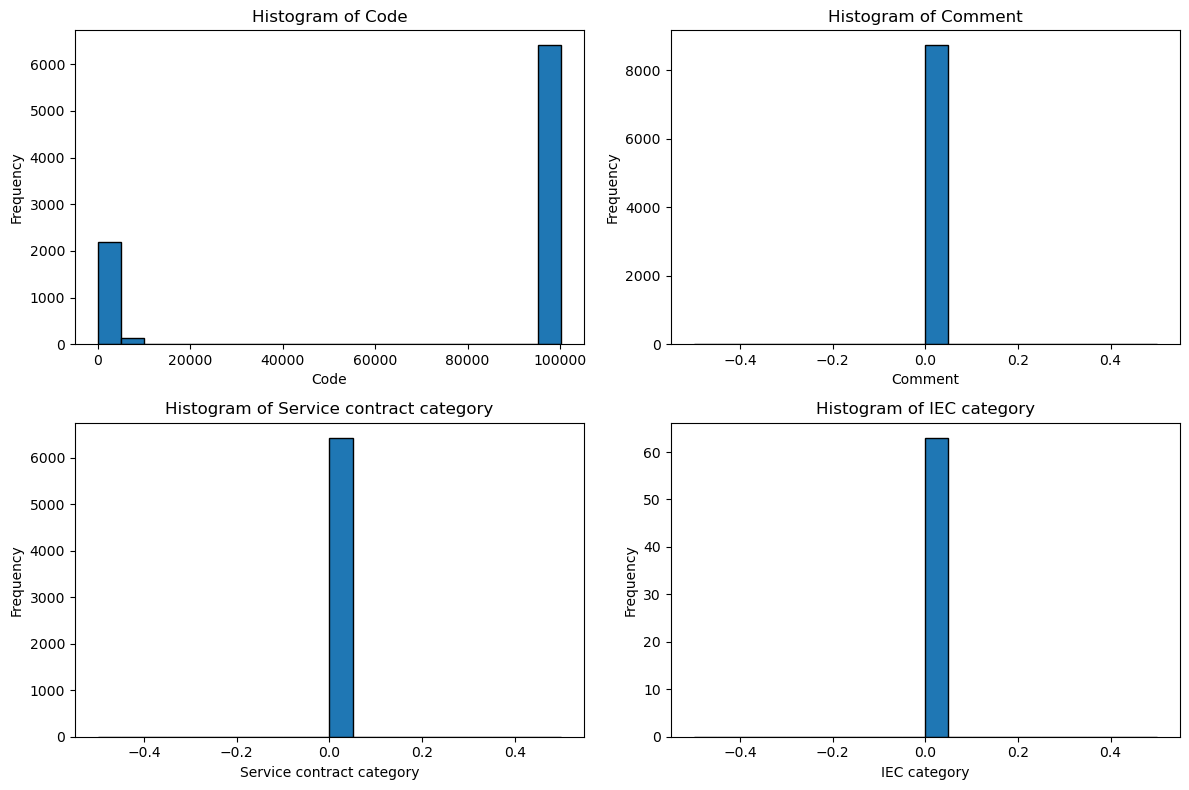

In [59]:
#histogram
selected_columns = ['Code', 'Comment', 'Service contract category', 'IEC category'] 
#subplots for histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

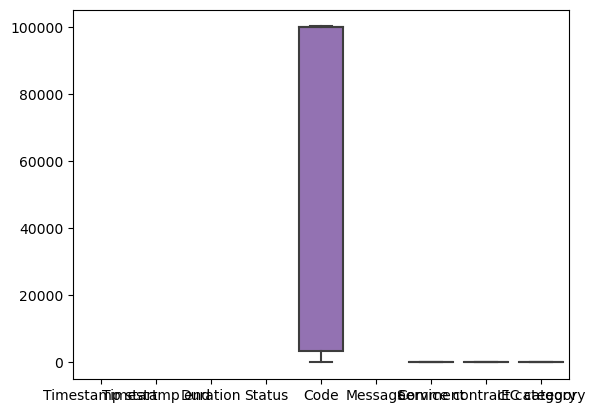

In [60]:
sns.boxplot(data=df)
plt.show()

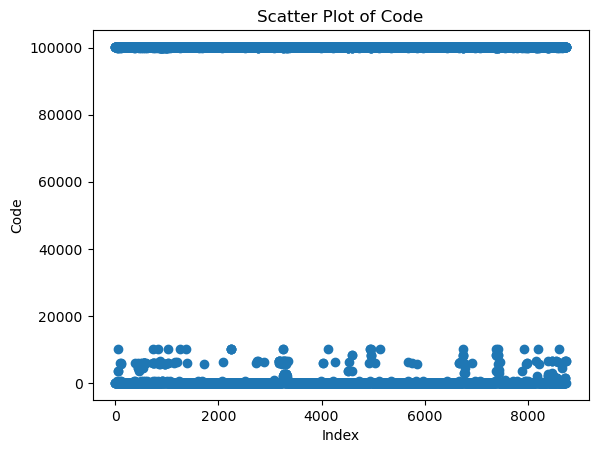

In [61]:
selected_column = 'Code' 
#scatter plot
plt.scatter(df.index, df[selected_column])
plt.title(f'Scatter Plot of {selected_column}')
plt.xlabel('Index')
plt.ylabel(selected_column)
plt.show()

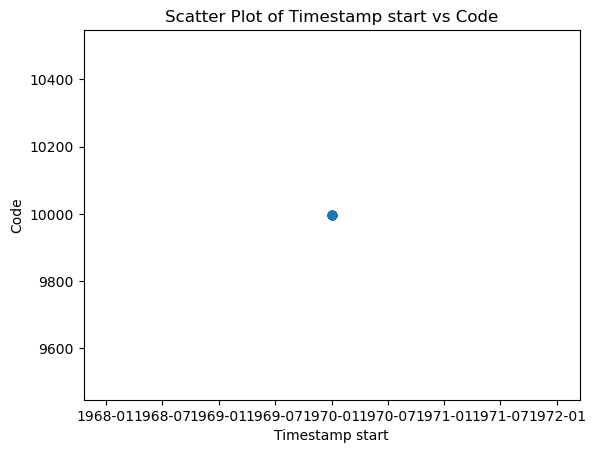

In [88]:
column_x = 'Timestamp start'
column_y = 'Code'
#scatter plot
plt.scatter(df[column_x], df[column_y])
plt.title(f'Scatter Plot of {column_x} vs {column_y}')
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

In [63]:
correlated_columns = corr_mat[(corr_mat > 0.7) & (corr_mat < 1.0)].stack().index
print("Highly correlated columns:")
print(correlated_columns)

Highly correlated columns:
MultiIndex([], )


C:\Users\vigne\AppData\Local\Temp\ipykernel_18852\2479650609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['column'] = 1
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


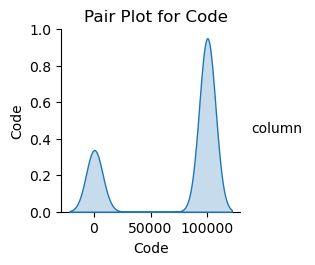

In [64]:
selected_column = 'Code'

selected_df = df[[selected_column]]

#dummy column
selected_df['column'] = 1

# Create a pair plot
sns.pairplot(selected_df, hue='column')
plt.suptitle(f'Pair Plot for {selected_column}', y=1.02)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


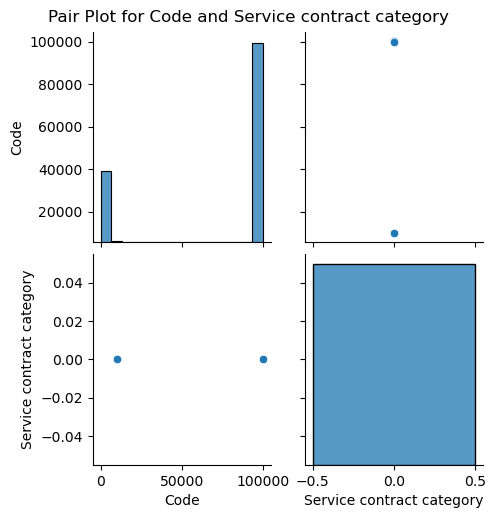

In [65]:
selected_column1 = 'Code'
selected_column2 = 'Service contract category'  

# Create a pair plot
sns.pairplot(df[[selected_column1, selected_column2]])
plt.suptitle(f'Pair Plot for {selected_column1} and {selected_column2}', y=1.02)
plt.show()

In [66]:
#categorical column to numeric
df['Timestamp start'] = df['Timestamp start'].astype('category').cat.codes

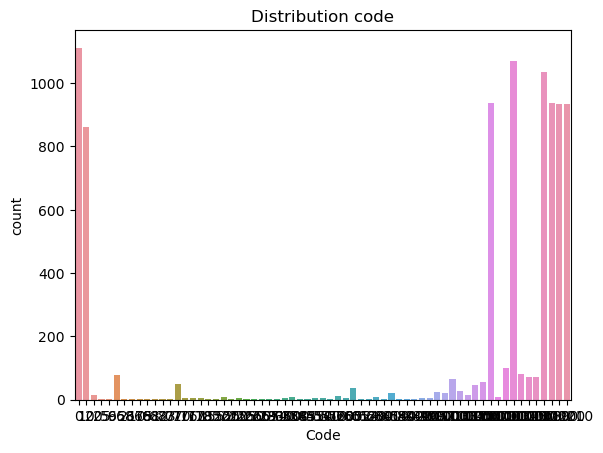

In [67]:
import seaborn as sns
sns.countplot(x='Code', data=df)
plt.title('Distribution code')
plt.show()

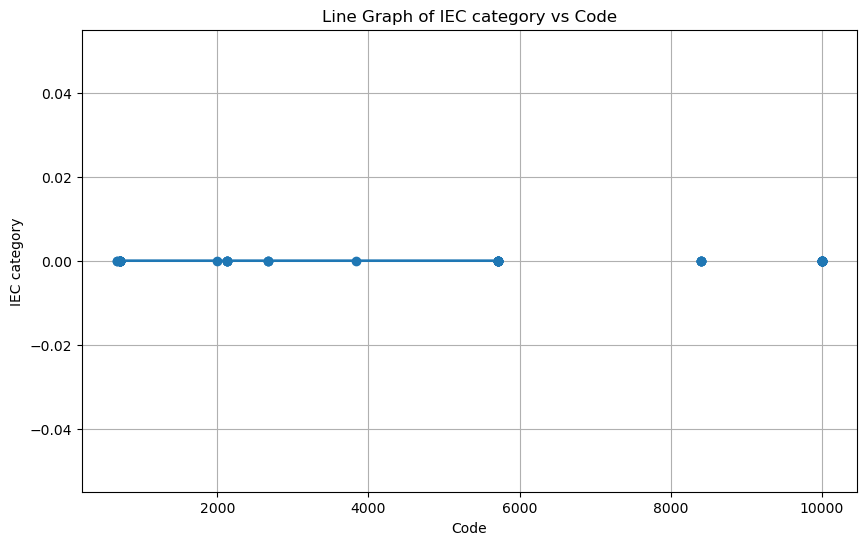

In [68]:
#line graph
x_column = 'Code'  
y_column = 'IEC category'  

plt.figure(figsize=(10, 6))
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-')
plt.title(f'Line Graph of {y_column} vs {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

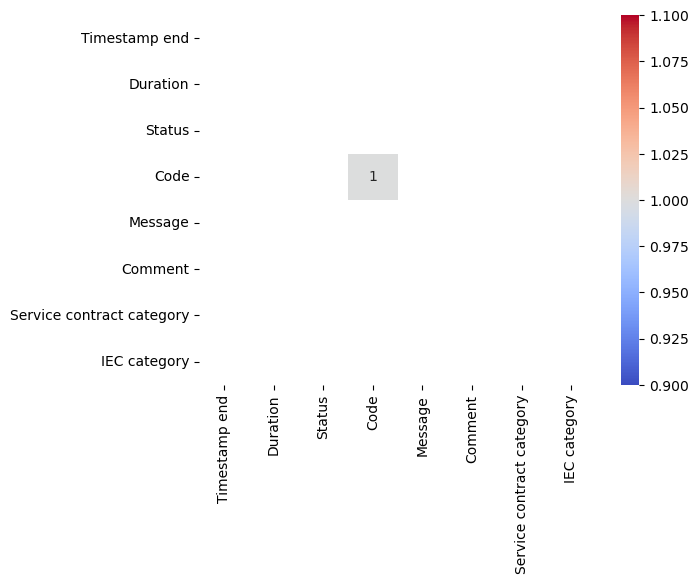

In [69]:
#numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_mat = df[numeric_columns].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

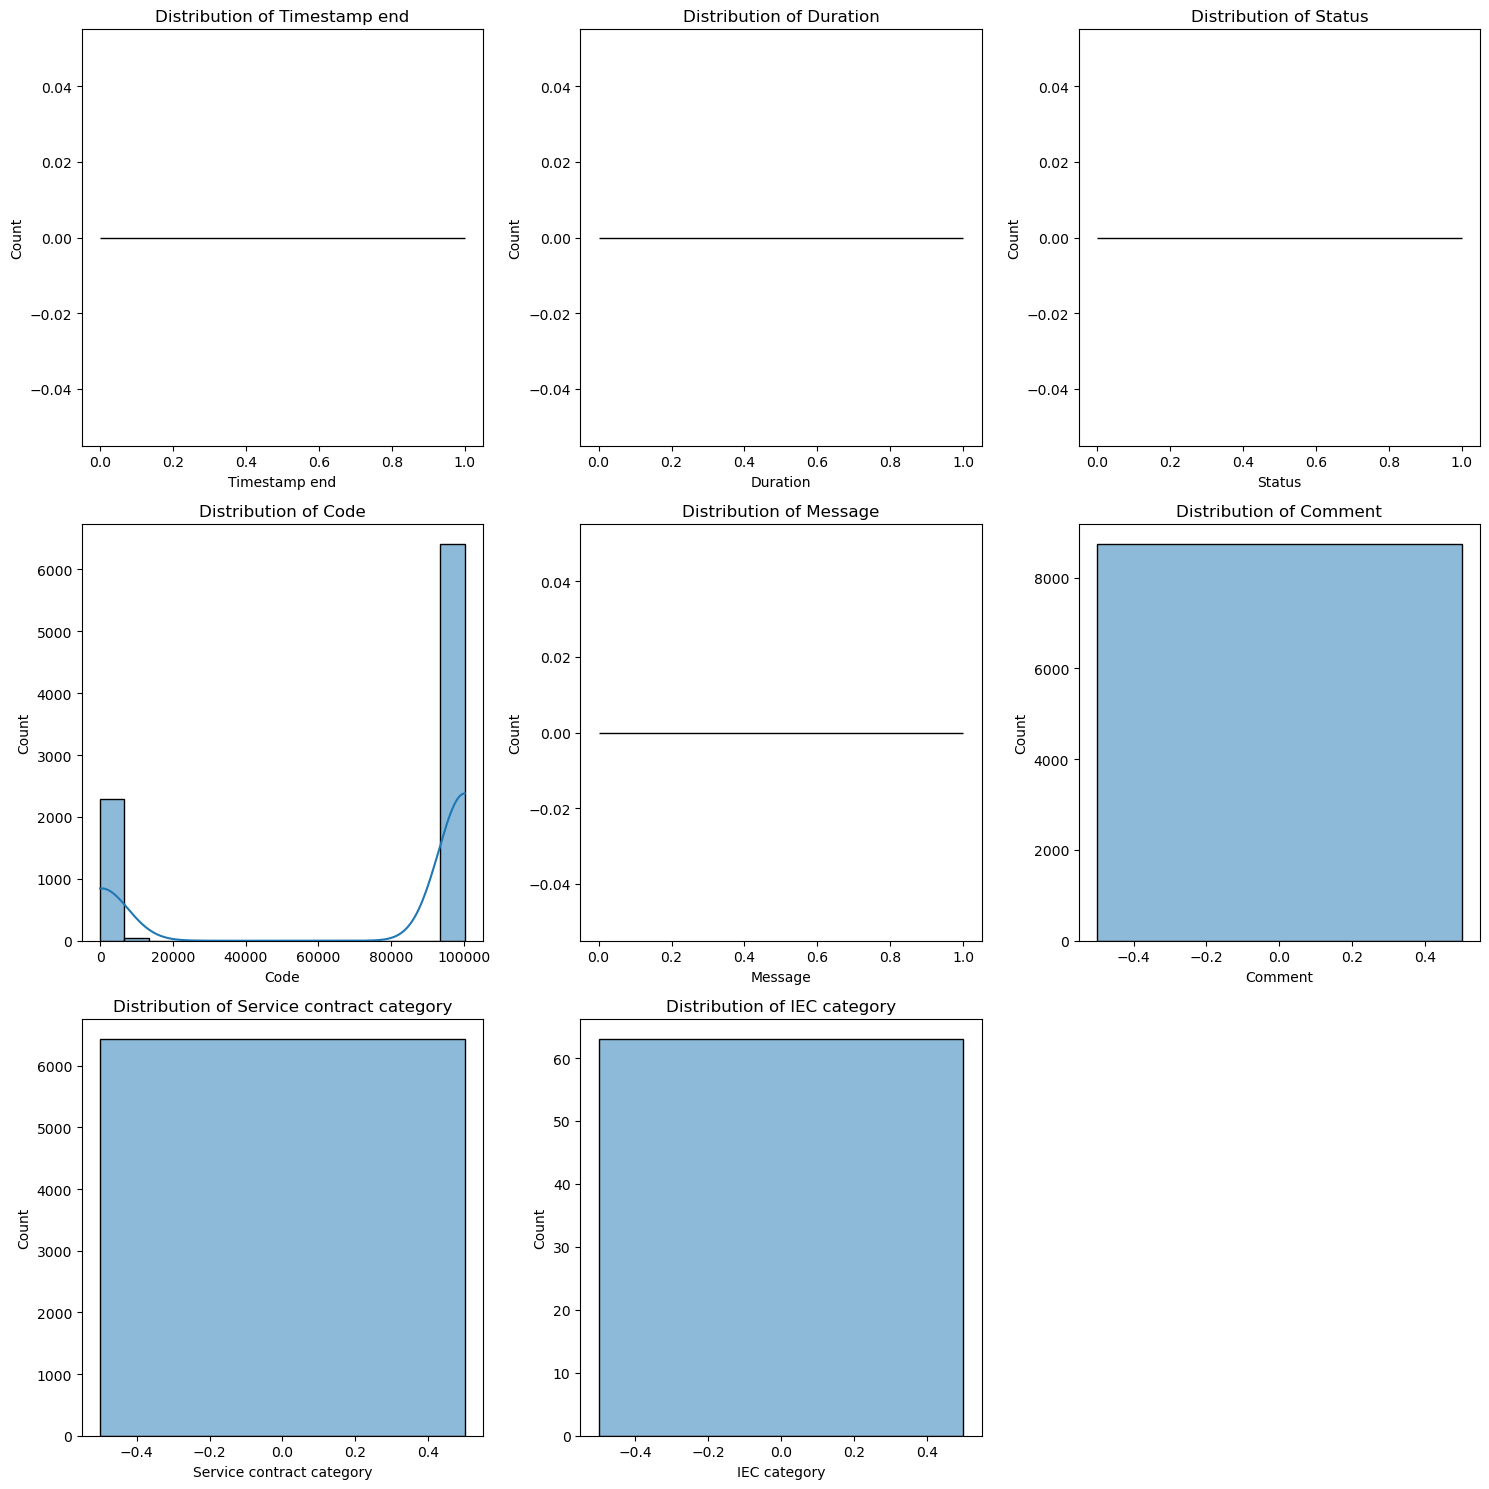

In [70]:
#EDA
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
num_cols_per_row = 3

plt.figure(figsize=(15, 5 * (num_cols_count // num_cols_per_row + 1)))
for i, column in enumerate(num_cols, 1):
    plt.subplot((num_cols_count // num_cols_per_row) + 1, num_cols_per_row, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

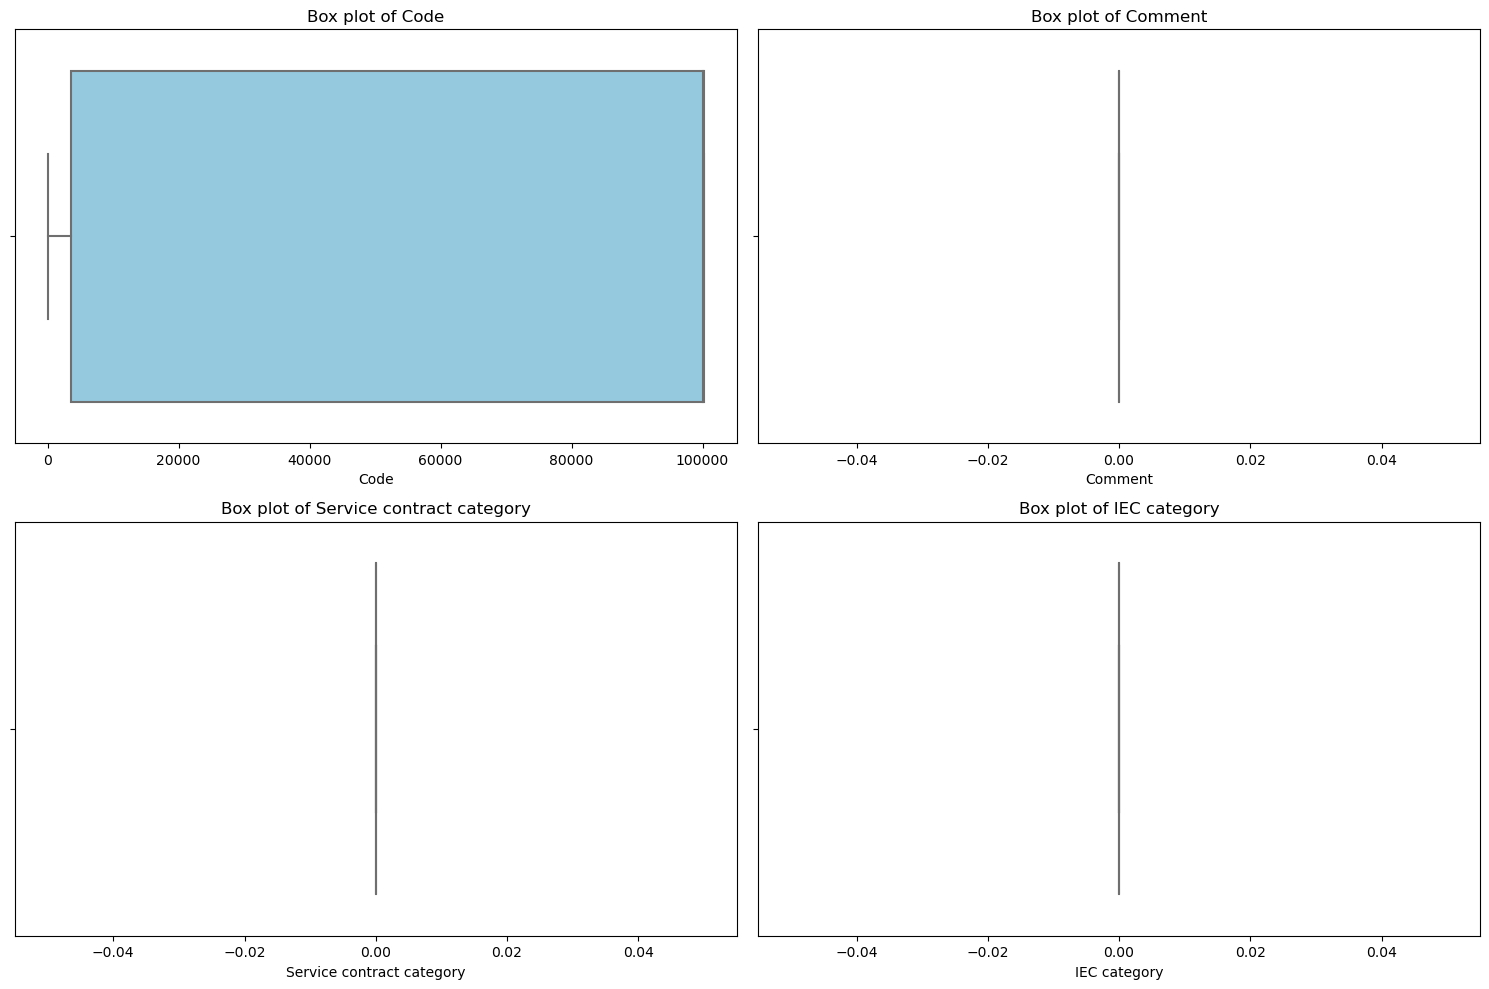

In [71]:
selected_columns = ['Code', 'Comment', 'Service contract category', 'IEC category']  

#box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

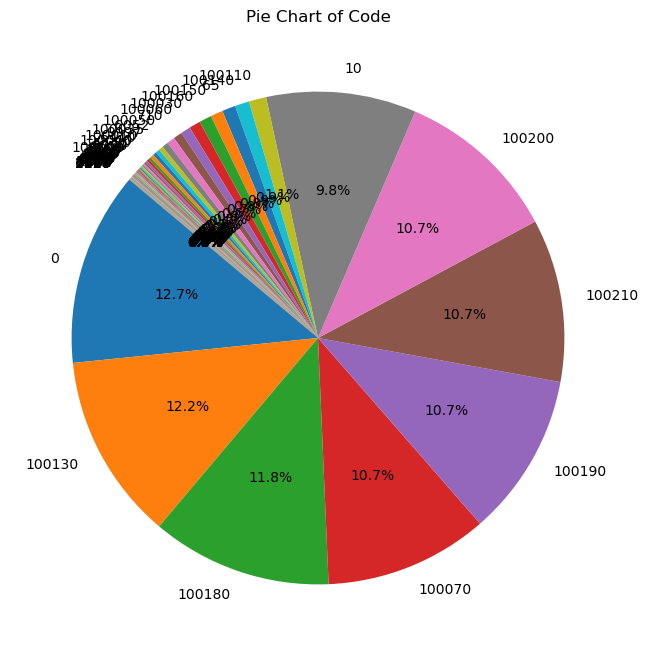

In [72]:
#pie chart
selected_column = 'Code'
value_counts = df[selected_column].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {selected_column}')
plt.show()

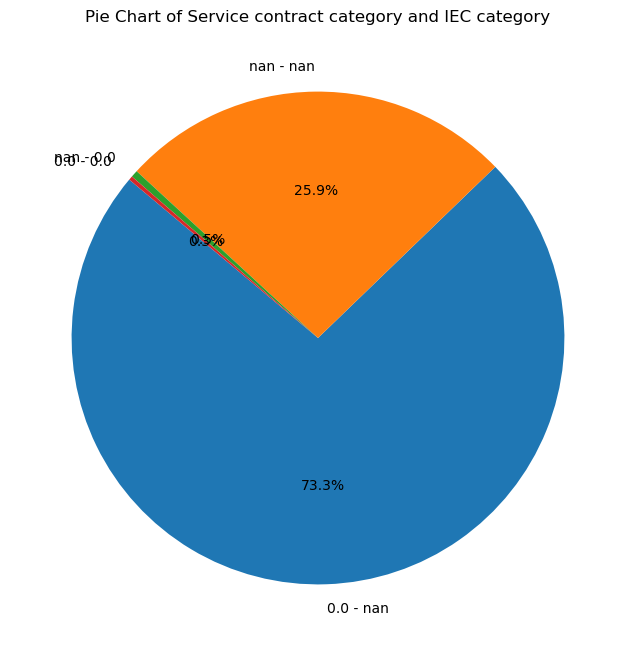

In [73]:
column1 = 'Service contract category' 
column2 = 'IEC category'  

combined_values = df[column1].astype(str) + ' - ' + df[column2].astype(str)

value_counts = combined_values.value_counts()

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column1} and {column2}')
plt.show()

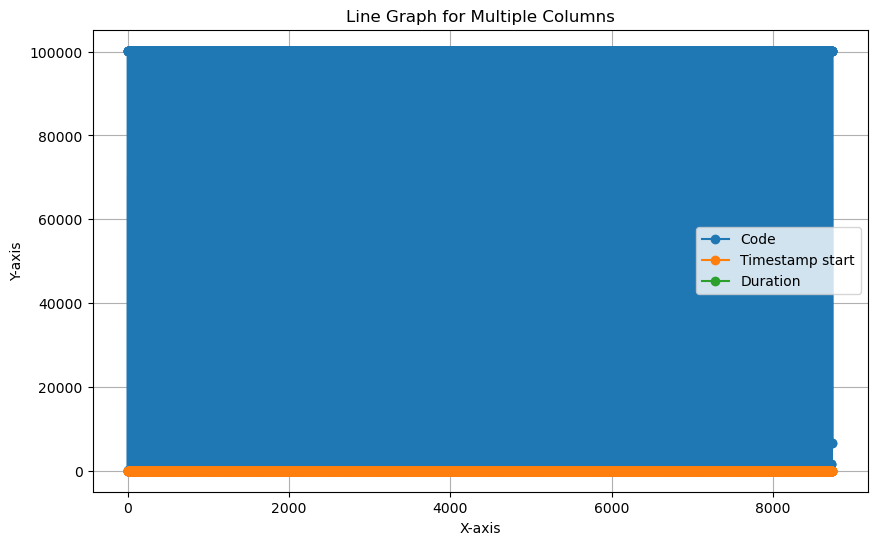

In [74]:
selected_columns = ['Code', 'Timestamp start', 'Duration']

# Create a line graph for multiple columns
plt.figure(figsize=(10, 6))
for column in selected_columns:
    plt.plot(df[column], label=column, marker='o', linestyle='-')

plt.title('Line Graph for Multiple Columns')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

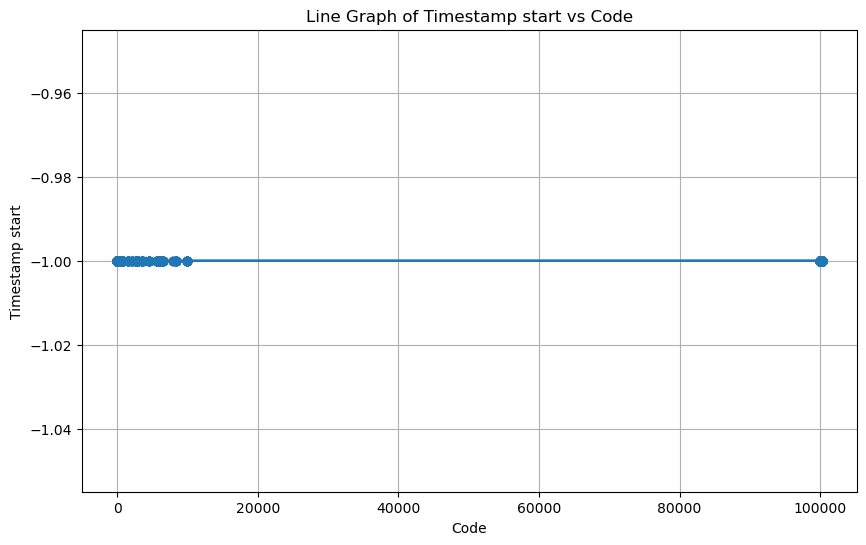

In [75]:
x_column = 'Code'
y_column = 'Timestamp start'  

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-')
plt.title(f'Line Graph of {y_column} vs {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

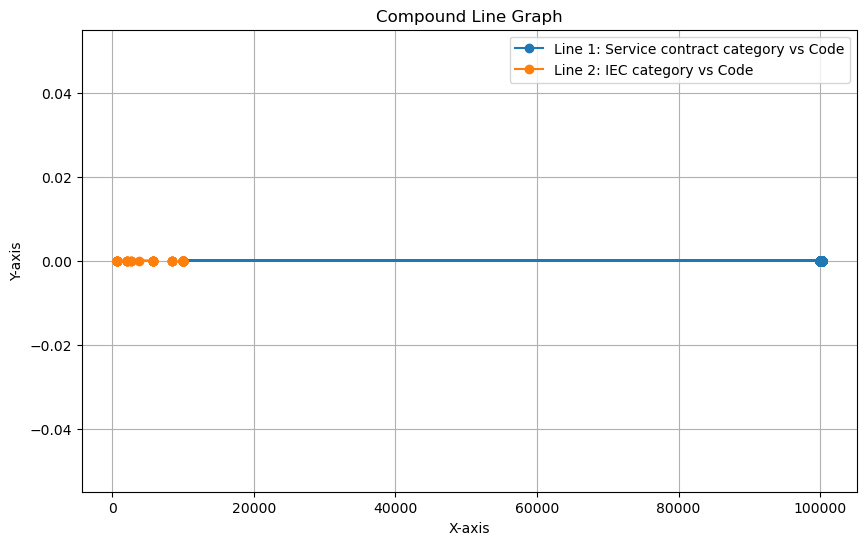

In [76]:
#compound line graph
x_column1 = 'Code'  
y_column1 = 'Service contract category'

x_column2 = 'Code'  
y_column2 = 'IEC category' 
# Create a compound line graph
plt.figure(figsize=(10, 6))

#first line
plt.plot(df[x_column1], df[y_column1], marker='o', label=f'Line 1: {y_column1} vs {x_column1}')

#second line
plt.plot(df[x_column2], df[y_column2], marker='o', label=f'Line 2: {y_column2} vs {x_column2}')

plt.title('Compound Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Display unique values and data types
print(df['Timestamp start'].unique())
print(df['Duration'].unique())
print(df.dtypes)

[-1]
[nan]
Timestamp start                 int8
Timestamp end                float64
Duration                     float64
Status                       float64
Code                           int64
Message                      float64
Comment                      float64
Service contract category    float64
IEC category                 float64
dtype: object


In [81]:
print(df.columns)

Index(['Timestamp start', 'Timestamp end', 'Duration', 'Status', 'Code',
       'Message', 'Comment', 'Service contract category', 'IEC category'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           Timestamp start  Timestamp end  Duration  Status           Code  \
count                 8737            0.0       0.0     0.0    8737.000000   
mean   1969-12-31 23:59:59            NaN       NaN     NaN   73578.267598   
min    1969-12-31 23:59:59            NaN       NaN     NaN       0.000000   
25%    1969-12-31 23:59:59            NaN       NaN     NaN    3500.000000   
50%    1969-12-31 23:59:59            NaN       NaN     NaN  100130.000000   
75%    1969-12-31 23:59:59            NaN       NaN     NaN  100190.000000   
max    1969-12-31 23:59:59            NaN       NaN     NaN  100210.000000   
std                    NaN            NaN       NaN     NaN   44085.598061   

       Message  Comment  Service contract category  IEC category  
count      0.0   8737.0                     6430.0          63.0  
mean       NaN      0.0                        0.0           0.0  
min        NaN      0.0                        0.0           0.0  
25%        NaN      0.0      

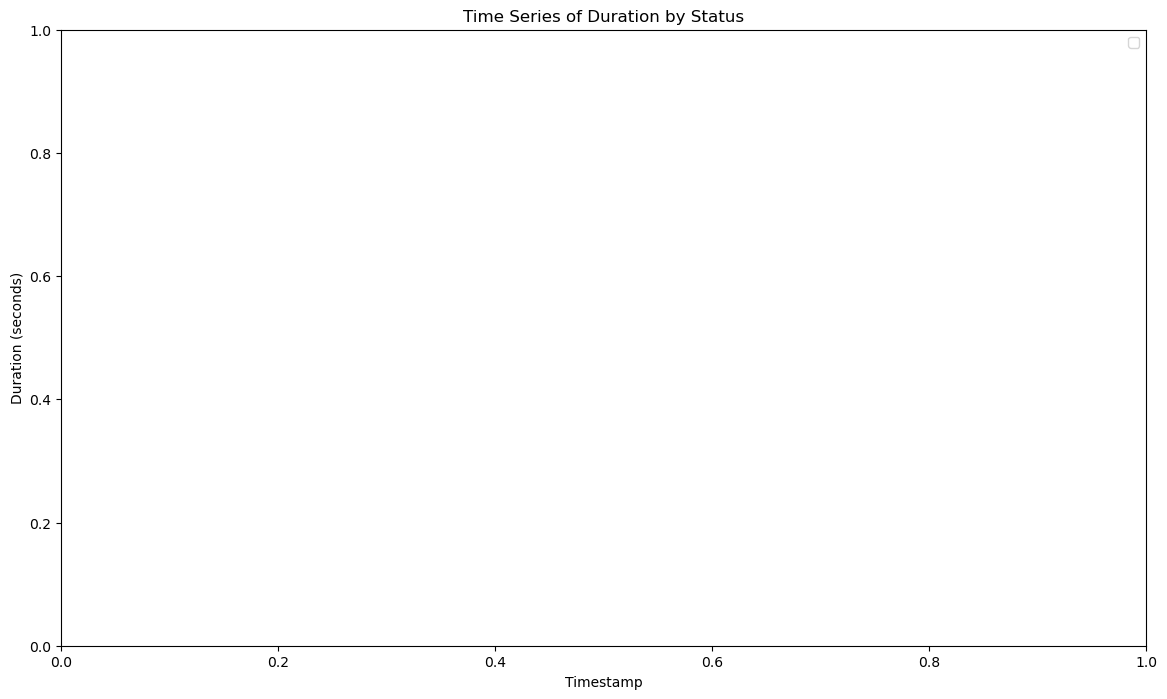

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Duration' to seconds
df['Duration'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

# Convert 'Timestamp start' to datetime
df['Timestamp start'] = pd.to_datetime(df['Timestamp start'], unit='s', origin='unix')

# Print summary statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Check unique values in 'Status'
print(df['Status'].unique())

# Plot time series for 'Duration' by Status
plt.figure(figsize=(14, 8))
for status, status_df in df.groupby('Status'):
    plt.plot(status_df['Timestamp start'], status_df['Duration'], label=f'Status: {status}')

plt.title('Time Series of Duration by Status')
plt.xlabel('Timestamp')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.show()


In [84]:
# Convert 'Timestamp start' to datetime
df['Timestamp start'] = pd.to_datetime(df['Timestamp start'], unit='s', origin='unix')

# Drop columns with no useful information
df.drop(['Timestamp end', 'Duration', 'Status', 'Message'], axis=1, inplace=True)

# Drop rows with missing values in 'Service contract category' and 'IEC category'
df.dropna(subset=['Service contract category', 'IEC category'], inplace=True)

In [86]:
# Display the column names
print(df.columns)


Index(['Timestamp start', 'Code', 'Comment', 'Service contract category',
       'IEC category'],
      dtype='object')
